In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(rc={'figure.figsize':(12.7,8.27)})


In [2]:
path = "/Users/kamil/Desktop/Otomoto_projekt/csv_files" # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

otomoto_df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
otomoto_df.shape

(262711, 22)

In [4]:
otomoto_df.link.nunique()

155418

In [5]:
otomoto_df.columns

Index(['Unnamed: 0', 'link', 'features', 'state', 'year', 'mileage_km', 'engine_power', 'engine_capacity', 'fuel_type', 'price', 'city', 'region', 'make', 'model', 'version', 'category', 'color', 'origin', 'gearbox', 'transmission', 'private_business', 'ad_id'], dtype='object')

In [6]:
otomoto_df.drop_duplicates('link', inplace=True)
otomoto_df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
otomoto_df.shape

(155418, 21)

In [8]:
otomoto_df['state'].value_counts()

Używane    142307
Nowe        13111
Name: state, dtype: int64

## Checking and adjusting types of variables

In [9]:
otomoto_df.head()

,link,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business,ad_id
0,https://www.otomoto.pl/oferta/fiat-fiorino-fia...,"['abs', 'alloy-wheels', 'asr', 'bluetooth', 'c...",Używane,2021.0,2500.0,80.0,1248.0,diesel,80000.0,swarzedz,wielkopolskie,fiat,fiorino,NaN,minivan,grey,pl,manual,front-wheel,private,6.095545e+09
1,https://www.otomoto.pl/oferta/fiat-sedici-fiat...,"['abs', 'asr', 'electric-exterior-mirror', 'el...",Używane,2009.0,180000.0,107.0,1586.0,petrol,22900.0,swiatniki-gorne,malopolskie,fiat,sedici,NaN,suv,white,i,manual,all-wheel-lock,private,6.096721e+09
2,https://www.otomoto.pl/oferta/fiat-bravo-ID6EB...,"['abs', 'cd', 'central-lock', 'front-electric-...",Używane,2011.0,120000.0,90.0,1368.0,petrol,20500.0,sosnowiec,slaskie,fiat,bravo,gen-ii-2007-bravo,compact,black,NaN,manual,front-wheel,private,6.096719e+09
3,https://www.otomoto.pl/oferta/fiat-punto-evo-1...,"['abs', 'bluetooth', 'alloy-wheels', 'alarm', ...",Używane,2011.0,134319.0,70.0,1242.0,petrol,17400.0,ruda-slaska,slaskie,fiat,punto-evo,NaN,city-car,black,NaN,manual,front-wheel,private,6.096523e+09
4,https://www.otomoto.pl/oferta/fiat-ducato-max-...,"['abs', 'alarm', 'asr', 'central-lock', 'cd', ...",Używane,2010.0,137000.0,120.0,2287.0,diesel,32900.0,rakow_71907,swietokrzyskie,fiat,ducato,gen-iii-2007-ducato,minivan,white,pl,manual,front-wheel,private,6.096724e+09


In [10]:
otomoto_df.dtypes

link                 object
features             object
state                object
year                float64
mileage_km          float64
engine_power        float64
engine_capacity     float64
fuel_type            object
price               float64
city                 object
region               object
make                 object
model                object
version              object
category             object
color                object
origin               object
gearbox              object
transmission         object
private_business     object
ad_id               float64
dtype: object

<AxesSubplot:xlabel='state', ylabel='Count'>

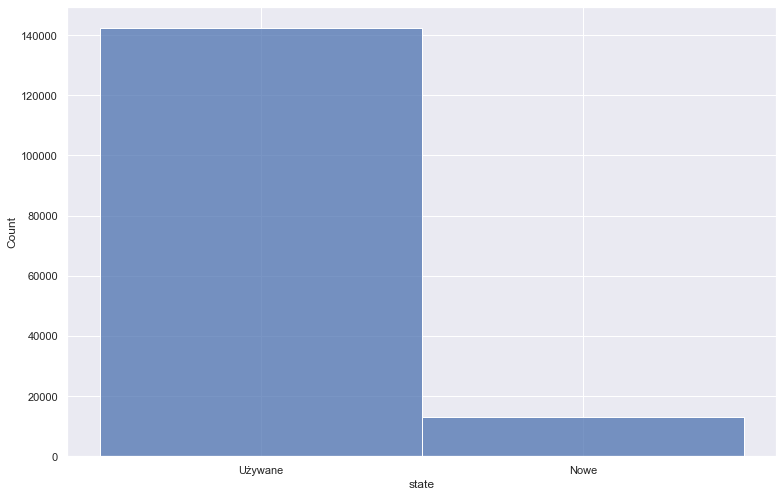

In [11]:
sns.histplot(otomoto_df['state'])


<AxesSubplot:xlabel='price', ylabel='Density'>

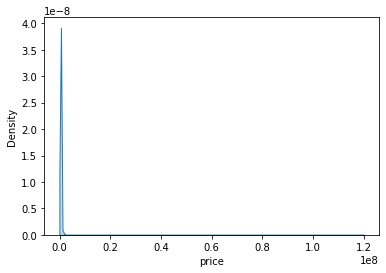

In [43]:
sns.kdeplot(otomoto_df['price'],shade=True)

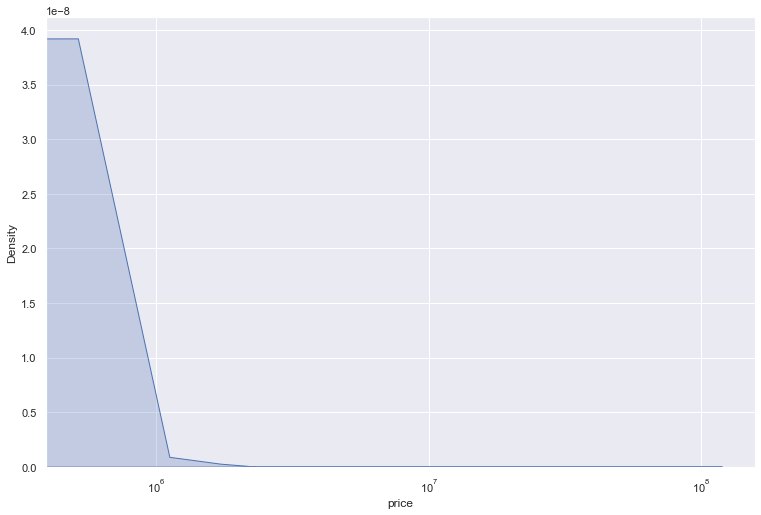

In [12]:
sns.kdeplot(otomoto_df['price'],shade=True)
plt.xscale('log')
plt.show()

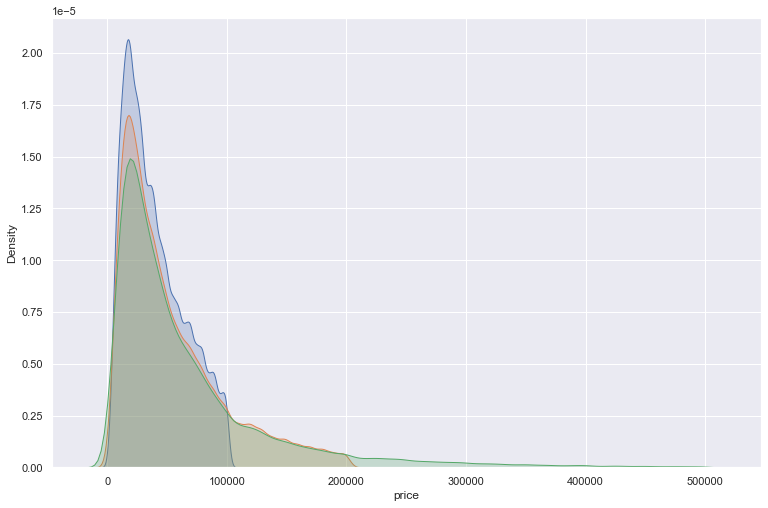

In [13]:
for i in [100000,200000,500000]:
    sns.kdeplot(x = otomoto_df[otomoto_df['price']<=i]['price'],
                shade=True)

In [14]:
otomoto_df['price'].describe()

count    1.551940e+05
mean     7.217479e+04
std      3.180063e+05
min      6.000000e+02
25%      2.190000e+04
50%      4.290000e+04
75%      8.370000e+04
max      1.199000e+08
Name: price, dtype: float64

In [15]:
otomoto_df[otomoto_df['price']==otomoto_df['price'].max()]['link']

175834    https://www.otomoto.pl/oferta/mercedes-benz-kl...
Name: link, dtype: object

In [16]:
otomoto_df.columns

Index(['link', 'features', 'state', 'year', 'mileage_km', 'engine_power', 'engine_capacity', 'fuel_type', 'price', 'city', 'region', 'make', 'model', 'version', 'category', 'color', 'origin', 'gearbox', 'transmission', 'private_business', 'ad_id'], dtype='object')

<AxesSubplot:xlabel='mileage_km', ylabel='price'>

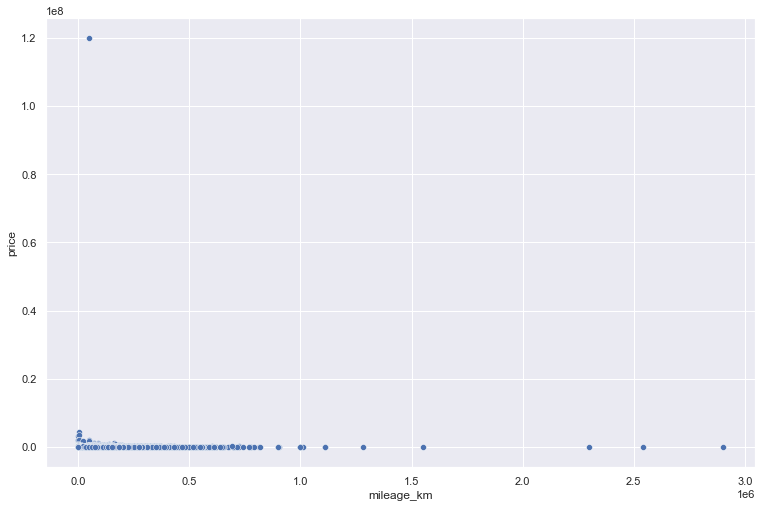

In [17]:
sns.scatterplot(data=otomoto_df,
               x='mileage_km',
               y='price')

In [18]:
stats.trim_mean(otomoto_df['price'], 0.01)


66800.66497938415

In [19]:
otomoto_df['price'].mean()

72174.79314805979

In [20]:
otomoto_df =  otomoto_df[otomoto_df['link'] != otomoto_df.loc[otomoto_df['price'].idxmax(), 'link']]
otomoto_df['price'].mean()

71402.67182037843

In [21]:
otomoto_df['price'].describe()

count    1.551930e+05
mean     7.140267e+04
std      9.276777e+04
min      6.000000e+02
25%      2.190000e+04
50%      4.290000e+04
75%      8.370000e+04
max      4.444444e+06
Name: price, dtype: float64

In [22]:
otomoto_df.dropna().sort_values(by='price')[['price','link']].tail(40)

,price,link
91214,739900.0,https://www.otomoto.pl/oferta/land-rover-range...
174141,749900.0,https://www.otomoto.pl/oferta/mercedes-benz-kl...
239696,750000.0,https://www.otomoto.pl/oferta/porsche-911-pors...
250737,750700.0,https://www.otomoto.pl/oferta/porsche-911-turb...
172957,752600.0,https://www.otomoto.pl/oferta/mercedes-benz-kl...
179044,753900.0,https://www.otomoto.pl/oferta/mercedes-benz-kl...
172111,755000.0,https://www.otomoto.pl/oferta/audi-a8-a8-salon...
241572,764700.0,https://www.otomoto.pl/oferta/bmw-x6-m-competi...
168925,764900.0,https://www.otomoto.pl/oferta/audi-s8-4-0tfsi-...
250530,772000.0,https://www.otomoto.pl/oferta/porsche-911-turb...


In [23]:
otomoto_df.dropna().sort_values(by='price')[['price','link']].head(40)['link'].to_list()

['https://www.otomoto.pl/oferta/volkswagen-polo-uzywany-do-codziennej-jazdy-ID6EA8y3.html',
 'https://www.otomoto.pl/oferta/ford-mondeo-ford-mondeo-1-6-benzyna-rok-1998-ID6EAAZk.html',
 'https://www.otomoto.pl/oferta/volkswagen-transporter-odbior-czerwiec-transporter-t6-1-150km-led-rata-leasingu-60-m-cy-ID6EuCU1.html',
 'https://www.otomoto.pl/oferta/volkswagen-passat-volkswagen-passat-b4-1-8-b-85tys-kil-ID6EjQrm.html',
 'https://www.otomoto.pl/oferta/opel-astra-sprzedam-opel-astra-f-classic-1-4-lpg-ID6EyHSp.html',
 'https://www.otomoto.pl/oferta/ford-mondeo-ford-mondeo-kombi-ID6Emf9Q.html',
 'https://www.otomoto.pl/oferta/renault-scenic-ID6EpiAU.html',
 'https://www.otomoto.pl/oferta/nissan-primera-nissan-primera-1999r-1-8-benzyna-ID6EASdt.html',
 'https://www.otomoto.pl/oferta/nissan-almera-nissan-almera-n16-1-8-benzyna-ID6Ez1OL.html',
 'https://www.otomoto.pl/oferta/opel-vectra-vectra-b-od-1999-jeden-wlasciciel-250tys-przebiegu-ID6EABc5.html',
 'https://www.otomoto.pl/oferta/opel-as

In [32]:
otomoto_df[otomoto_df['link']=='https://www.otomoto.pl/oferta/renault-clio-renault-clio-3-2010r-uszkodzony-sprzedam-w-calosci-lub-na-czesci-ID6EADxn.html']['features']

258489    ['abs', 'central-lock', 'electronic-rearview-m...
Name: features, dtype: object

In [24]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [25]:
otomoto_df.shape

(155417, 21)

<AxesSubplot:xlabel='mileage_km', ylabel='price'>

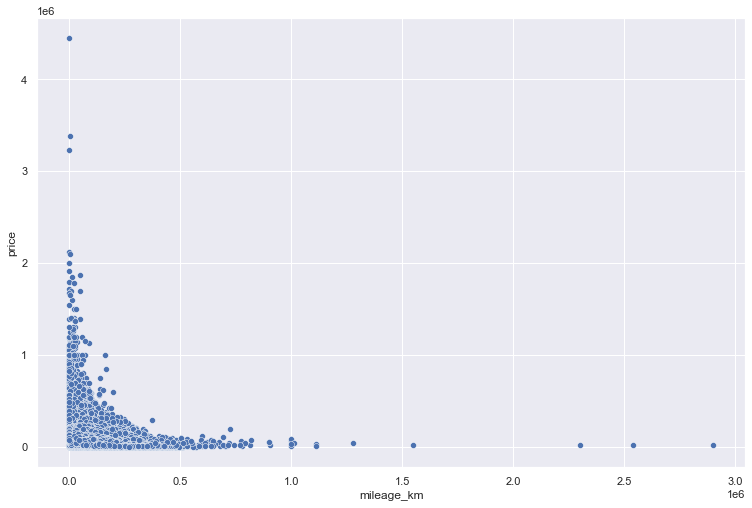

In [28]:
# sns.scatterplot(data=remove_outlier(otomoto_df, 'price'),
#                x='mileage_km',
#                y='price')

sns.scatterplot(data=otomoto_df,
               x='mileage_km',
               y='price')







In [35]:
df = otomoto_df.groupby(['make', 'model']).mean().sort_values('price').tail(50)

<AxesSubplot:xlabel='mileage_km', ylabel='price'>

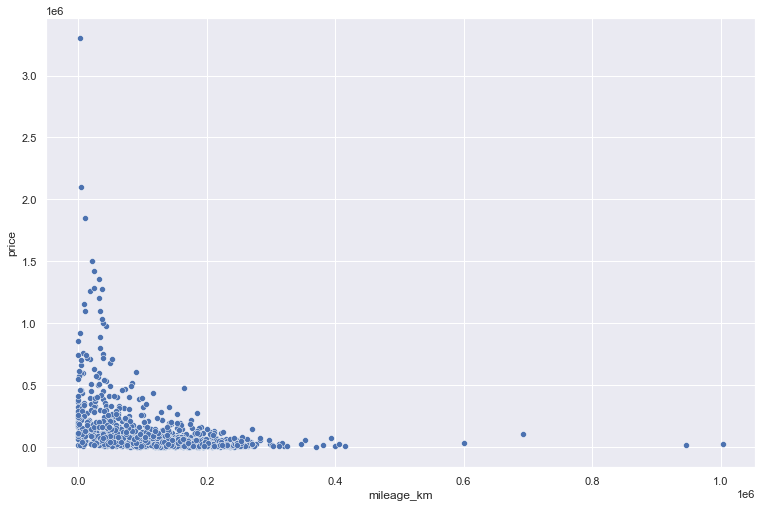

In [39]:
sns.scatterplot(data=otomoto_df.groupby(['make', 'model']).mean(),
               x='mileage_km',
               y='price')

In [40]:
otomoto_df.columns

Index(['link', 'features', 'state', 'year', 'mileage_km', 'engine_power', 'engine_capacity', 'fuel_type', 'price', 'city', 'region', 'make', 'model', 'version', 'category', 'color', 'origin', 'gearbox', 'transmission', 'private_business', 'ad_id'], dtype='object')

In [42]:
otomoto_df['state'].value_counts()

Używane    142306
Nowe        13111
Name: state, dtype: int64

In [48]:
sorted(otomoto_df['year'].unique())

[1927.0,
 1939.0,
 1941.0,
 1946.0,
 1948.0,
 1950.0,
 1951.0,
 1953.0,
 1954.0,
 1955.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 nan]

In [49]:
sum(otomoto_df['year'].isna())

224

In [51]:
otomoto_df['mileage_km'].describe()

count    1.547830e+05
mean     1.397428e+05
std      9.242271e+04
min      1.000000e+00
25%      6.606450e+04
50%      1.418170e+05
75%      2.010000e+05
max      2.900002e+06
Name: mileage_km, dtype: float64

In [53]:
otomoto_df.loc[otomoto_df['mileage_km'].idxmax(), 'link']

'https://www.otomoto.pl/oferta/volkswagen-golf-vw-golf-vi-140km-ID6EACYC.html'

In [54]:
otomoto_df['engine_power'].describe()

count    155144.000000
mean        156.111052
std          80.320751
min           1.000000
25%         109.000000
50%         140.000000
75%         180.000000
max        1500.000000
Name: engine_power, dtype: float64

In [58]:
otomoto_df.loc[otomoto_df['engine_power'].idxmin(), 'link']

'https://www.otomoto.pl/oferta/jeep-compass-compas-2-4-super-stan-kamera-automat-177km-sprawdz-ID6EpbdX.html'

In [70]:
otomoto_df.loc[otomoto_df['engine_power']<5,'engine_power'].value_counts()

4.0    36
1.0    12
3.0     3
2.0     1
Name: engine_power, dtype: int64

In [71]:
otomoto_df['engine_capacity'].describe()

count    154100.000000
mean       1894.291999
std         759.732086
min           1.000000
25%        1461.000000
50%        1796.000000
75%        1997.000000
max        8400.000000
Name: engine_capacity, dtype: float64

In [73]:
otomoto_df.loc[otomoto_df['engine_power'].idxmin(), 'link']

'https://www.otomoto.pl/oferta/jeep-compass-compas-2-4-super-stan-kamera-automat-177km-sprawdz-ID6EpbdX.html'

In [33]:
otomoto_df.make.value_counts()

audi              12573
volkswagen        12248
opel              11829
ford              10255
mercedes-benz      9380
bmw                9005
renault            9003
skoda              7228
toyota             7076
peugeot            6907
hyundai            5485
citroen            5467
kia                4992
nissan             4446
volvo              4070
fiat               3837
seat               3823
mazda              3547
honda              2983
suzuki             2221
dacia              1919
mitsubishi         1856
jeep               1794
chevrolet          1438
mini               1290
alfa-romeo         1216
land-rover         1122
porsche            1003
lexus               972
jaguar              900
dodge               860
subaru              823
chrysler            653
saab                340
infiniti            280
ssangyong           239
smart               207
lancia              164
maserati            149
cupra               148
ds-automobiles      140
cadillac        